# Blackwell Electronics
## Customer Transaction Data 
## Exploratory Analysis

* Do customers in different regions spend more per transaction?
* Is there a relationship between the number of items purchased and the amount spent?



*Data Source: Demographic_Data.csv (provided by Danielle Sherman)*

In [1]:
#Import libraries

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import seaborn as sns 
%matplotlib inline

# Set default matplot figure size
plt.rcParams['figure.figsize'] = (10.0, 8.0)

### Initial Analysis

In [2]:
# Import the csv file for analysis
df = pd.read_csv('demographic_data.csv')

In [3]:
# Check the first 5 rows of the data frame
df.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [4]:
# Show the number of values and data type for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [5]:
# Check the column names
df.columns

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')

In [6]:
# basic statistics for each column of the data
df.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [7]:
# Count the unique values for each column

df.nunique()

in-store        2
age            68
items           8
amount      56112
region          4
dtype: int64

In [8]:
# Drop any duplicate records
df = df.drop_duplicates()

In [9]:
# Number of transactions, in-store vs online
df.groupby('in-store')['in-store'].count()

in-store
0    39989
1    39990
Name: in-store, dtype: int64

In [10]:
# Number of transactions, by region
df.groupby('region')['region'].count()

region
1    15997
2    19994
3    18000
4    25988
Name: region, dtype: int64

**Initial Analysis Summary:**

* There are 80,000 observations.
* All columns supplied are integer values, except for the amount column which is a floating point decimal.

* in-store: Purchases made in-store or online
    * 0 = in-store purchases (39,989 values)
    * 1 = online purchases (39,990 values)
    
* age: The age of the customer 
    * 68 unique values from 18 to 85 years
    * Mean age is 45.8 years
    * Standard deviation is 15.7 years

* items: The number of items purchased in the transaction
    * 8 values from 1 to 8 items
    * Mean is 4.5 items
    * Standard deviation is 2.1 items

* amount: The total value, in dollars, purchased in the transaction
    * 56,112 unique values from \\$5.00 to \\$3,000
    * Mean is \\$835.92
    * Max is \\$3000.00
* region: The sales region where the transaction took place
    * 1 = North (15,997 values)
    * 2 = South (19,994 values)
    * 3 = East (18,000 values)
    * 4 = West (25,988 values)

### Data Preparation

In [11]:
# Add columns with descriptive labels for in-store and region
# Replace numeric codes for in-store and region with descriptive labels

# trantype - 'Transaction Type' - in-store or online
# regionname - 'Region Name'

df.loc[df['in-store'] == 1, 'trantype'] = 'in-store'
df.loc[df['in-store'] == 0, 'trantype'] = 'online'

df.loc[df['region'] == 1, 'regionname'] = 'North'
df.loc[df['region'] == 2, 'regionname'] = 'South'
df.loc[df['region'] == 3, 'regionname'] = 'East'
df.loc[df['region'] == 4, 'regionname'] = 'West'

In [12]:
# Show the first five rows with the descriptive labels
df.head()

,in-store,age,items,amount,region,trantype,regionname
0,0,37,4,281.03,2,online,South
1,0,35,2,219.51,2,online,South
2,1,45,3,1525.70,4,in-store,West
3,1,46,3,715.25,3,in-store,East
4,1,33,4,1937.50,1,in-store,North


In [13]:
# Correlation matrix
df.corr()

,in-store,age,items,amount,region
in-store,1.000000,-0.178180,-0.003897,-0.085573,-0.133171
age,-0.178180,1.000000,0.000657,-0.282033,-0.235370
items,-0.003897,0.000657,1.000000,0.000384,-0.001904
amount,-0.085573,-0.282033,0.000384,1.000000,0.403486
region,-0.133171,-0.235370,-0.001904,0.403486,1.000000


Positive correlations exist between items and age, items and amount, and region and amount

In [14]:
# Covariance matrix
df.cov()

,in-store,age,items,amount,region
in-store,0.250003,-1.400071,-0.004017,-30.860425,-0.075019
age,-1.400071,246.966189,0.021270,-3196.782841,-4.167305
items,-0.004017,0.021270,4.248751,0.570791,-0.004421
amount,-30.860425,-3196.782841,0.570791,520221.252295,327.874873
region,-0.075019,-4.167305,-0.004421,327.874873,1.269321


* Positive covariance exists between items and age, items and amount, and region and amount.
* The strongest covariance is between region and amount. Because region is descriptive, this value (327.87) would indicate that customers in different regions spend different amounts per transaction, indicating it is likely that customers in different regions spend more per transaction.
* The strongest covariance between non-descriptive columns is between items and amount (0.57). This would indicate that there is a relationship between the number of items purchased and the amount spent.

### Do customers in different regions spend more per transaction?

In [15]:
# Mean of amount spent per transaction by region
df.groupby('region')['amount'].mean()

region
1     744.990939
2     252.097741
3     917.969637
4    1283.938357
Name: amount, dtype: float64

It would appear that customers in region 4 spend more per transaction, on average, while customers in region 2 spend much less.

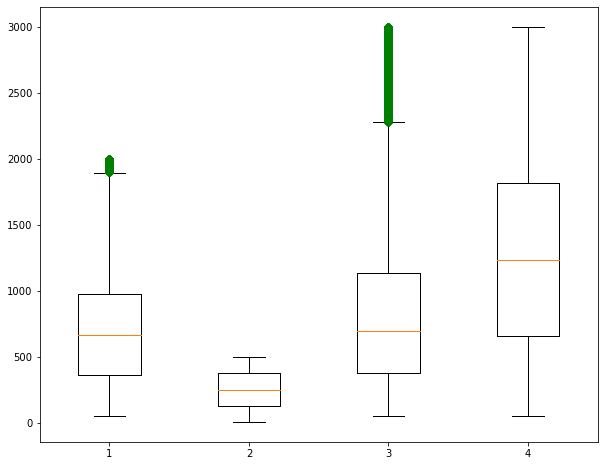

In [16]:
# Prepare boxplot of amounts spent per region
R1 = df.loc[df.loc[:,'regionname']=='North']
R1 = R1['amount'].apply(float)

R2 = df.loc[df.loc[:,'regionname']=='South']
R2 = R2['amount'].apply(float)

R3 = df.loc[df.loc[:,'regionname']=='East']
R3 = R3['amount'].apply(float)

R4 = df.loc[df.loc[:,'regionname']=='West']
R4 = R4['amount'].apply(float)

plt.boxplot([R1,R2,R3,R4],0,'gD')
plt.show()

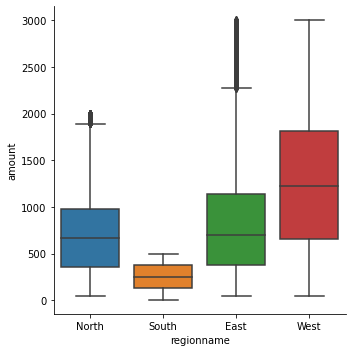

In [17]:
# box plot showing the plot of amount for each count of items purchased
sns.catplot(x='regionname', y='amount', data=df, kind='box', order=['North','South','East','West'] )

Again, it appears that customers in region 4 spend more per transaction on average. The interquartile range for region 4 is for the most part higher than the mean of each of the other individual regions. The interquartile range for region 2 is lower than the interquartile ranges of each of the other individual regions, so there is a big difference between spending patterns of regions 2 and 4. Regions 1 and 3 are more similar to each other in regard to the mean, but region 3 has a larger interquartile range and a much higher maximum transaction amount. 

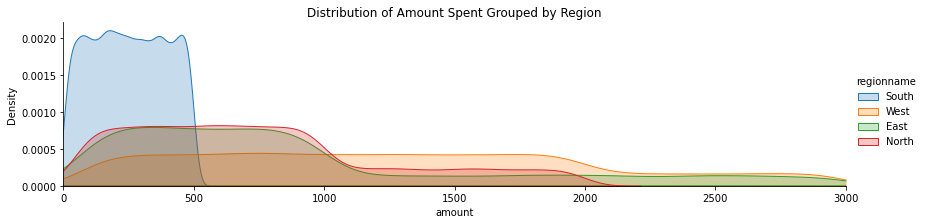

In [18]:
#plot showing distribution of amount spent grouped by region
fig = sns.FacetGrid(df, hue='regionname', aspect = 4)
fig.map(sns.kdeplot,'amount',shade=True)
oldest=df['amount'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Amount Spent Grouped by Region')
fig.add_legend()

In this plot, we can visually see the big differences between region 2 (South) and 4 (West). The density of amounts for the South region is concentrated under \\$500, while the West region's amounts are spread much more broadly. The North and East regions appear to have amounts concentrated under \\$1000, but the East region has a much broader range between the high and low amounts.

In [19]:
#crosstab showing the total amount spent per region in the provided dataset
pd.crosstab(index=df.regionname, columns=[df.trantype], values = df.amount.round(), aggfunc = 'mean', margins=True, margins_name='Total')

trantype,in-store,online,Total
regionname,,,
East,520.941449,1541.715755,917.965944
North,744.992186,NaN,744.992186
South,NaN,252.095629,252.095629
West,1024.242650,1543.635986,1283.939318
Total,774.105626,897.545775,835.824929


In [20]:
#crosstab showing the total amount spent per region in the provided dataset
pd.crosstab(index=df.regionname, columns=[df.trantype], values = df.amount.round(), aggfunc = sum, margins=True, margins_name='Total')

trantype,in-store,online,Total
regionname,,,
East,5729835.0,10793552.0,16523387.0
North,11917640.0,NaN,11917640.0
South,NaN,5040400.0,5040400.0
West,13309009.0,20058006.0,33367015.0
Total,30956484.0,35891958.0,66848442.0


In this table, we see that the North region does not have online transactions, and the South region does not have in-store transactions. The total of all transactions is \\$66,848,442, with more spent on online transactions than in-store. The West region has the highest total transaction total, followed by the East, North, and South. Both East and West have significantly higher amounts spent online vs in-store.

<AxesSubplot:ylabel='Frequency'>

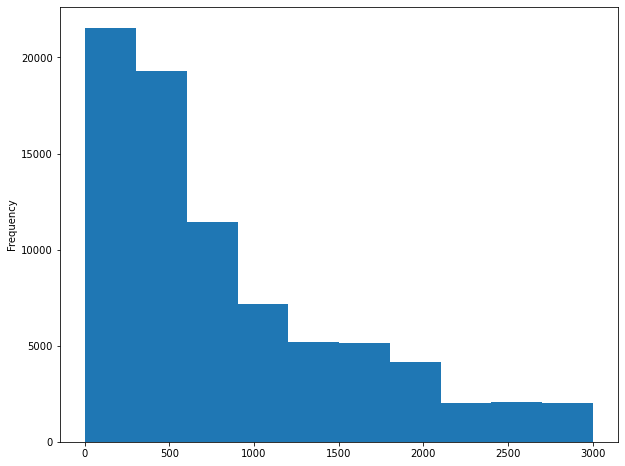

In [21]:
# histogram showing the frequency of the different amounts for transactions
df['amount'].apply(float).plot.hist()

The spending is different between regions, but why?

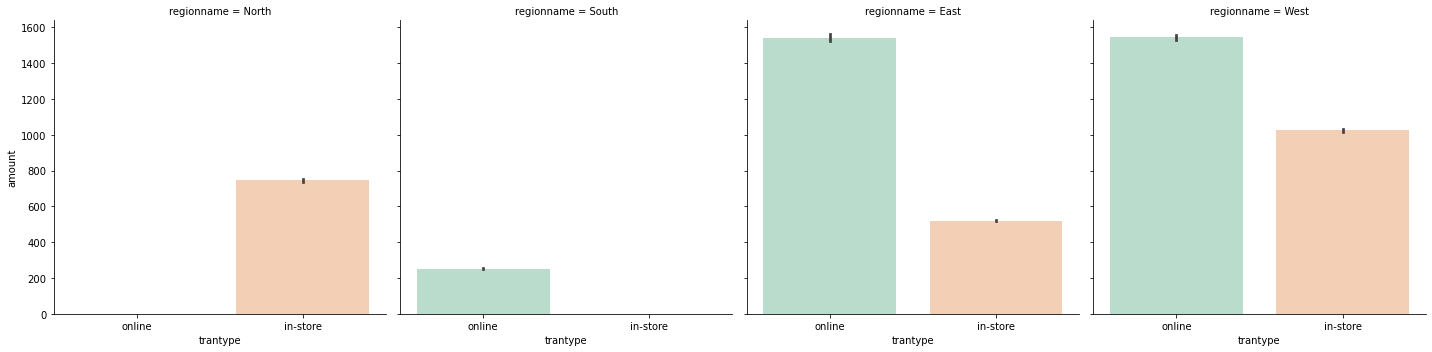

In [22]:
#Plot showing the total value of transactions by online/in-store for each region
sns.catplot(x='trantype', y='amount', data=df, kind='bar', palette='Pastel2', col='regionname', 
            col_order=['North','South','East','West'] )

We see that the North and South regions don't have both types of transactions. That could account for part of the difference. The East and West have about the same total online sales, but the East has fewer in-store sales.

In [23]:
# Create a function to group customers by age range
def age_range(age):
    
    if age < 20:
        return '<20'
    if age < 30:
        return '20-29'
    if age < 40:
        return '30-39'
    if age < 50:
        return '40-49'
    if age < 60:
        return '50-59'
    if age < 70:
        return '60-69'
    if age < 80:
        return '70-79'
    else:
        return '80+'

In [24]:
df['agerange'] = df['age'].apply(age_range)

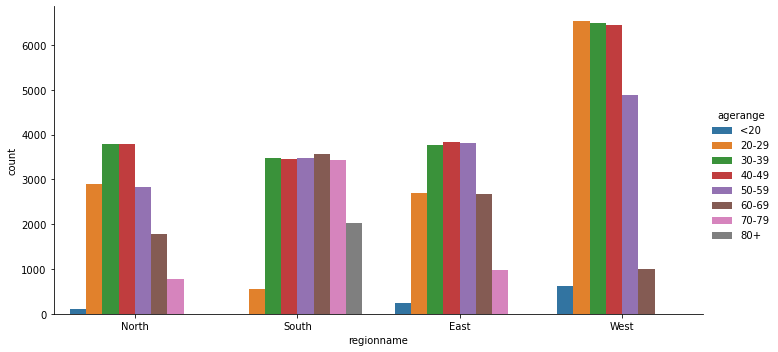

In [25]:
#factorplot of transactions grouped by region and age range.
sns.catplot(x='regionname', data=df, kind='count', hue='agerange', order=['North','South','East','West'],
            hue_order=['<20','20-29','30-39','40-49','50-59','60-69','70-79','80+'], aspect=2)

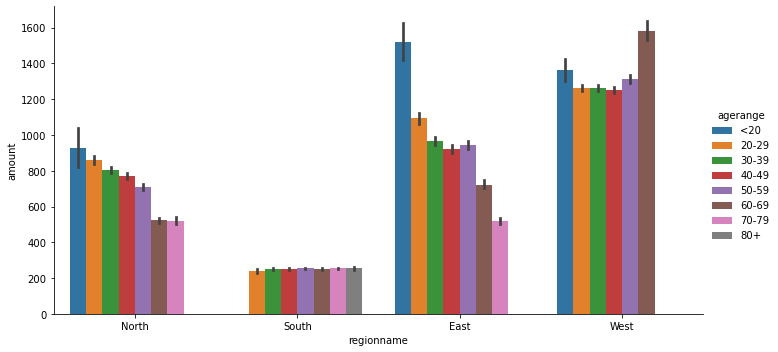

In [26]:
#factorplot of transactions grouped by region and age range.
sns.catplot(x='regionname', y='amount', data=df, kind='bar', hue='agerange', order=['North','South','East','West'],
            hue_order=['<20','20-29','30-39','40-49','50-59','60-69','70-79','80+'], aspect=2)

These two graphs show that the different regions have different age profiles. Also, the different age groups have different spending patterns.

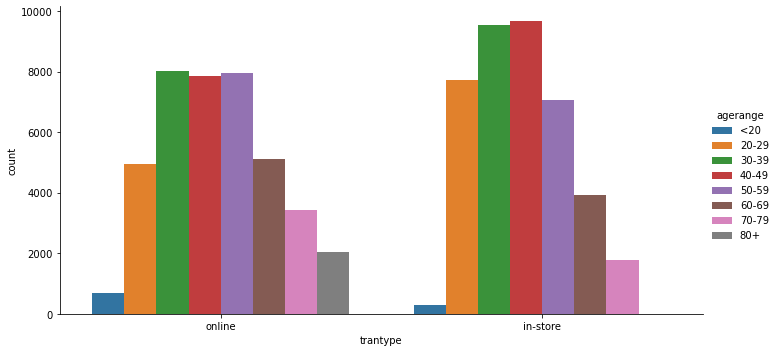

In [27]:
#factorplot of transactions grouped by region and age range.
sns.catplot(x='trantype', data=df, kind='count', hue='agerange', 
            hue_order=['<20','20-29','30-39','40-49','50-59','60-69','70-79','80+'], aspect=2)

In this graph, we see the online transactions are evenly split among the 30-39, 40-49, and 50-59 age groups, while in-store sales are greatest in the 40-49 age group, followed by the 30-39 age group, thent the 20-29 age group.

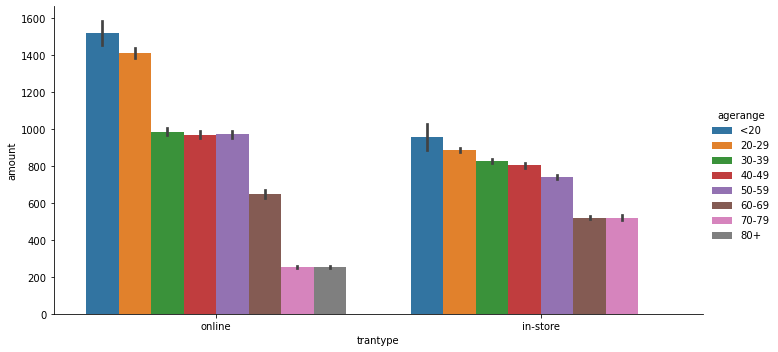

In [28]:
#factorplot of transactions grouped by region and age range.
sns.catplot(x='trantype', y='amount', data=df, kind='bar', hue='agerange', 
            hue_order=['<20','20-29','30-39','40-49','50-59','60-69','70-79','80+'], aspect=2)

In this graph, we see that for both online and in-store transactions, the amount spent declines with age.

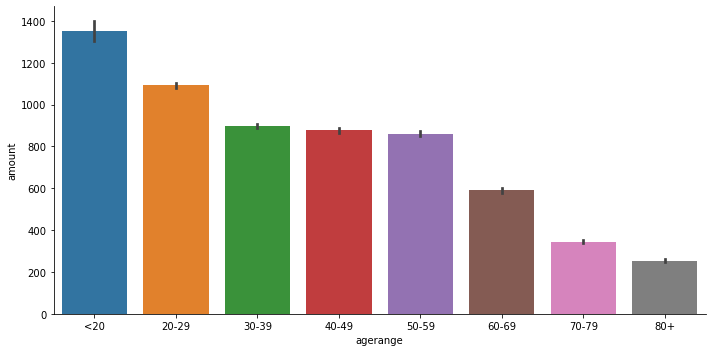

In [29]:
#factorplot of transactions grouped by region and age range.
sns.catplot(x='agerange', y='amount', data=df, kind='bar',
            order=['<20','20-29','30-39','40-49','50-59','60-69','70-79','80+'], aspect=2)

For all transactions, it appears that younger customers spend more.

### Is there a relationship between the number of items purchased and the amount spent?

In [30]:
# correlation matrix
df.corr()

,in-store,age,items,amount,region
in-store,1.000000,-0.178180,-0.003897,-0.085573,-0.133171
age,-0.178180,1.000000,0.000657,-0.282033,-0.235370
items,-0.003897,0.000657,1.000000,0.000384,-0.001904
amount,-0.085573,-0.282033,0.000384,1.000000,0.403486
region,-0.133171,-0.235370,-0.001904,0.403486,1.000000


In [31]:
# covariance matrix
df.cov()

,in-store,age,items,amount,region
in-store,0.250003,-1.400071,-0.004017,-30.860425,-0.075019
age,-1.400071,246.966189,0.021270,-3196.782841,-4.167305
items,-0.004017,0.021270,4.248751,0.570791,-0.004421
amount,-30.860425,-3196.782841,0.570791,520221.252295,327.874873
region,-0.075019,-4.167305,-0.004421,327.874873,1.269321


There is both a positive correlation between items and amount, and a positive covariance between items and amount, indicating that a relationship likely exists between the number of items purchased and the amount spent.

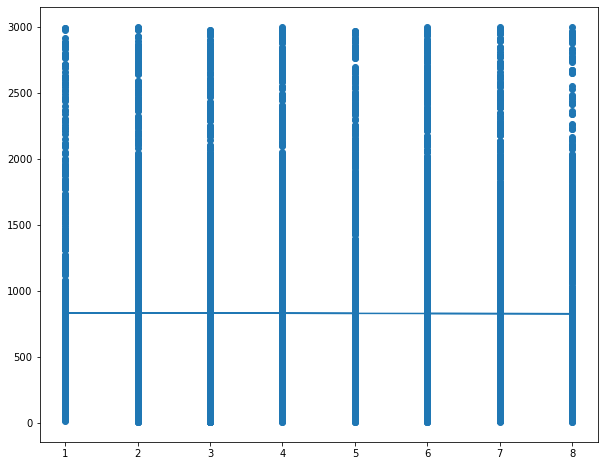

In [32]:
# creating a scatter plot of 10000 observations from the dataframe
df_sample = df.sample(50000)

x = df_sample['items']
y = df_sample['amount']

plt.scatter(x,y,marker='o')

# creating m (slope) and b (intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

# scatter plot with linear regression line
plt.plot(x, m*x+b)

In [33]:
m

-0.8448995542054369

Although there is a positive covariance, and the slope is positive, the increase in the total amount as items purchased is really insignificant.

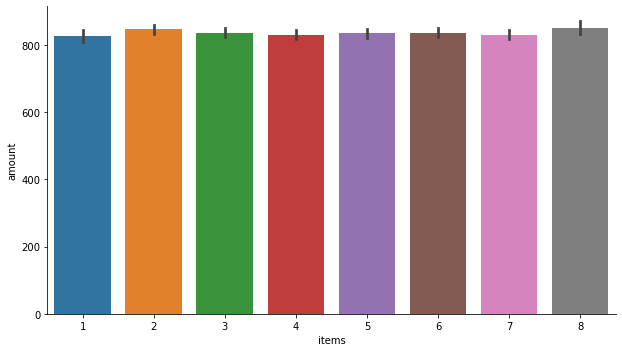

In [34]:
# catplot showing the mean amount for each count of items
g = sns.catplot(x='items', y='amount', data=df, kind='bar', aspect = 1.75)

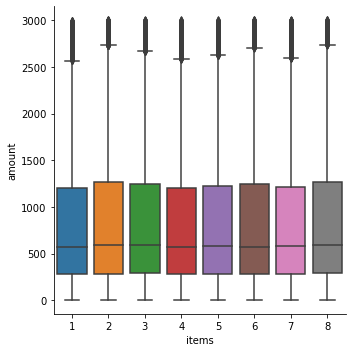

In [35]:
# box plot showing the plot of amount for each count of items purchased
sns.catplot(x='items', y='amount', data=df, kind='box')

In both plots, we see the mean amount purchased per item purchased is about the same. The interquartile ranges for each item are similar as well. 

/Users/thomashigginbotham/opt/anaconda3/envs/Course1env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Number of Items Purchased')

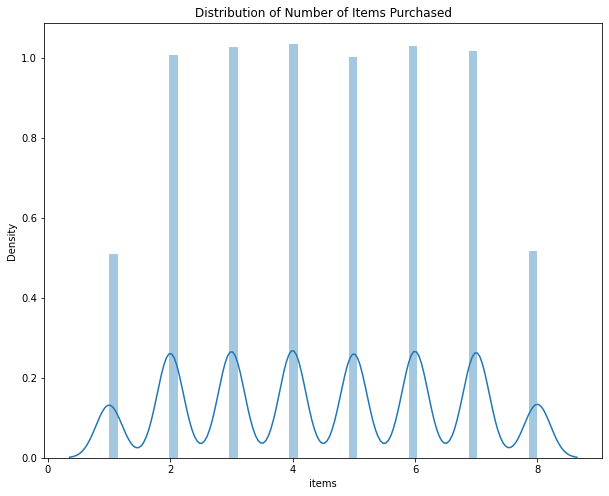

In [36]:
items_dist = sns.distplot(df['items'])
items_dist.set_title('Distribution of Number of Items Purchased')

The number of items purchased is spread pretty evenly from 2-6, lower for 1 and 8.

/Users/thomashigginbotham/opt/anaconda3/envs/Course1env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Amount Purchased')

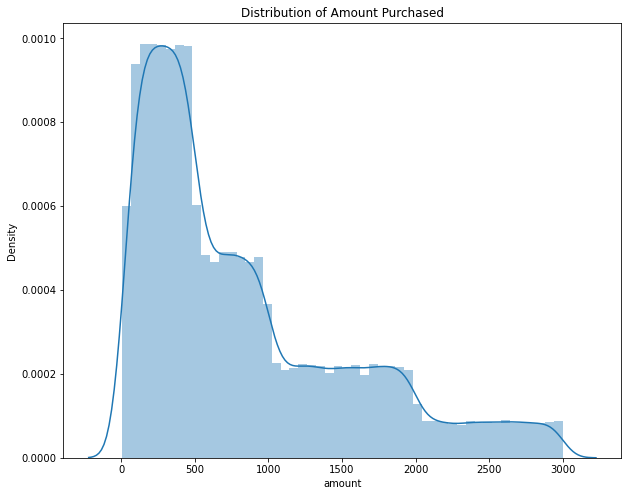

In [37]:
amount_dist = sns.distplot(df['amount'])
amount_dist.set_title('Distribution of Amount Purchased')

Transactions are most commonly under \\$500 total, followed by transactions under \\$1000, then under \\$2000

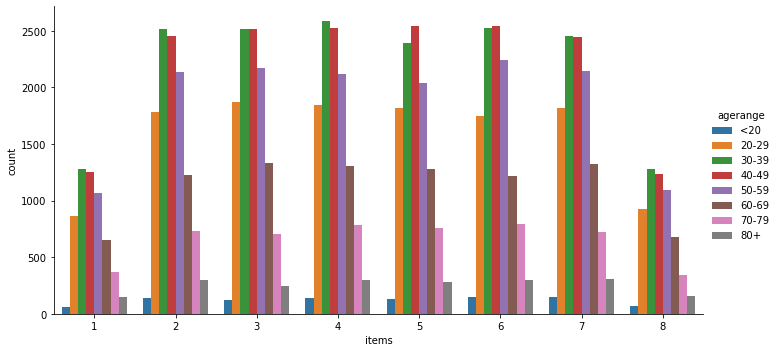

In [38]:
#factorplot of transactions grouped by region and age range.
sns.catplot(x='items', data=df, kind='count', hue='agerange', order=range(1,9),
            hue_order=['<20','20-29','30-39','40-49','50-59','60-69','70-79','80+'], aspect=2)

The age breakout per item purchased is similar for 2-7 items

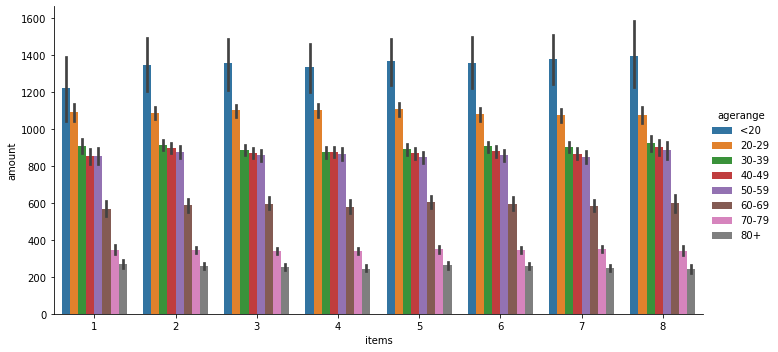

In [39]:
#factorplot of transactions grouped by region and age range.
sns.catplot(x='items', y='amount', data=df, kind='bar', hue='agerange', order=range(1,9),
            hue_order=['<20','20-29','30-39','40-49','50-59','60-69','70-79','80+'], aspect=2)

The age breakout for the total amount purchased per item is also very similar for all items.

### Conclusion

Even though customers in different regions tend to spend different amounts, that likely is due to the difference in the transaction mixes per regon between online and in-store, along with the demographic differences in customer ages for each region.

There may be a very weak relationship between the number of items and total amount purchased, but it appears to be insignificant.

In [40]:
df.to_csv('Demographic_Data_Clean.csv',index='false')